- 작업준비
- 데이터전처리
- 데이터시각화

### #01. 작업준비

### 패키지 설치

In [2]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb
import datetime as dt
import numpy as np

ModuleNotFoundError: No module named 'matplotlib'

### 데이터 가져오기

In [14]:
df = read_excel("https://data.hossam.kr/D01/covid19.xlsx")
df

,서울시 기준일,서울 확진자,서울시 일일 확진,서울시 사망,전국 확진,전국 일일 확진,전국 사망
0,2023-05-31,6204277,5987.0,6492,31703511.0,24411.0,34784
1,2023-05-30,6198290,3326.0,6486,31679100.0,13529.0,34767
2,2023-05-29,6194964,1393.0,6485,31665571.0,6868.0,34760
3,2023-05-28,6194964,1393.0,6485,31665571.0,6868.0,34760
4,2023-05-27,6191196,4078.0,6485,31647238.0,17796.0,34784
...,...,...,...,...,...,...,...
1207,2020-02-09,10,0.0,0,27.0,0.0,0
1208,2020-02-08,10,0.0,0,24.0,0.0,0
1209,2020-02-07,10,0.0,0,24.0,0.0,0
1210,2020-02-06,11,0.0,0,24.0,0.0,0


### #02. 데이터 전처리

### 1)검색 날짜 변수 생성

- 날짜 입력받기

In [15]:
#datetime -> str : shrftime
#일주일 단위 -> timedelta

input_date = input("검색일을 입력하세요(yyyymmdd)")
print(type(input_date))
input_date

<class 'str'>


'20220705'

- 입력받은 날짜를 datetime객체로 생성

In [16]:
start_date = dt.datetime.strptime(input_date,"%Y%m%d")
print(type(start_date))
start_date

<class 'datetime.datetime'>


datetime.datetime(2022, 7, 5, 0, 0)

### 2) 검색 종료일 구하기

In [17]:
delta = dt.timedelta(days=6)
end_date = start_date + delta
print(type(end_date))
end_date

<class 'datetime.datetime'>


datetime.datetime(2022, 7, 11, 0, 0)

### 3) 검색 기간에 따른 데이터 추출

In [18]:
query_df = df.query('`서울시 기준일` >= @start_date and `서울시 기준일` <=@end_date')
target_df = query_df.sort_values('서울시 기준일')
target_df

,서울시 기준일,서울 확진자,서울시 일일 확진,서울시 사망,전국 확진,전국 일일 확진,전국 사망
330,2022-07-05,3679421,4779.0,4898,18413997.0,18147.0,24576
329,2022-07-06,3684190,4770.0,4900,18433359.0,19371.0,24583
328,2022-07-07,3688769,4580.0,4901,18451862.0,18511.0,24593
327,2022-07-08,3693368,4605.0,4903,18471172.0,19323.0,24605
326,2022-07-09,3698267,4900.0,4905,18491435.0,20286.0,24624
325,2022-07-10,3703511,5244.0,4905,18511845.0,20410.0,24643
324,2022-07-11,3706133,2622.0,4907,18524538.0,12693.0,24661


### #03. 데이터 시각화

#### 1)그래프 설정

In [19]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams['axes.unicode_minus'] = False

#### 2) x축 레이블 만들기

#### x축 좌표

In [20]:
x = list(range(0, len(target_df['서울시 기준일'])))
x

[0, 1, 2, 3, 4, 5, 6]

#### x축 텍스트

In [21]:
xticks = []

for i in target_df['서울시 기준일']:
    xticks.append(i.strftime('%m.%d'))

xticks

['07.05', '07.06', '07.07', '07.08', '07.09', '07.10', '07.11']

#### 3) 그래프 그리기

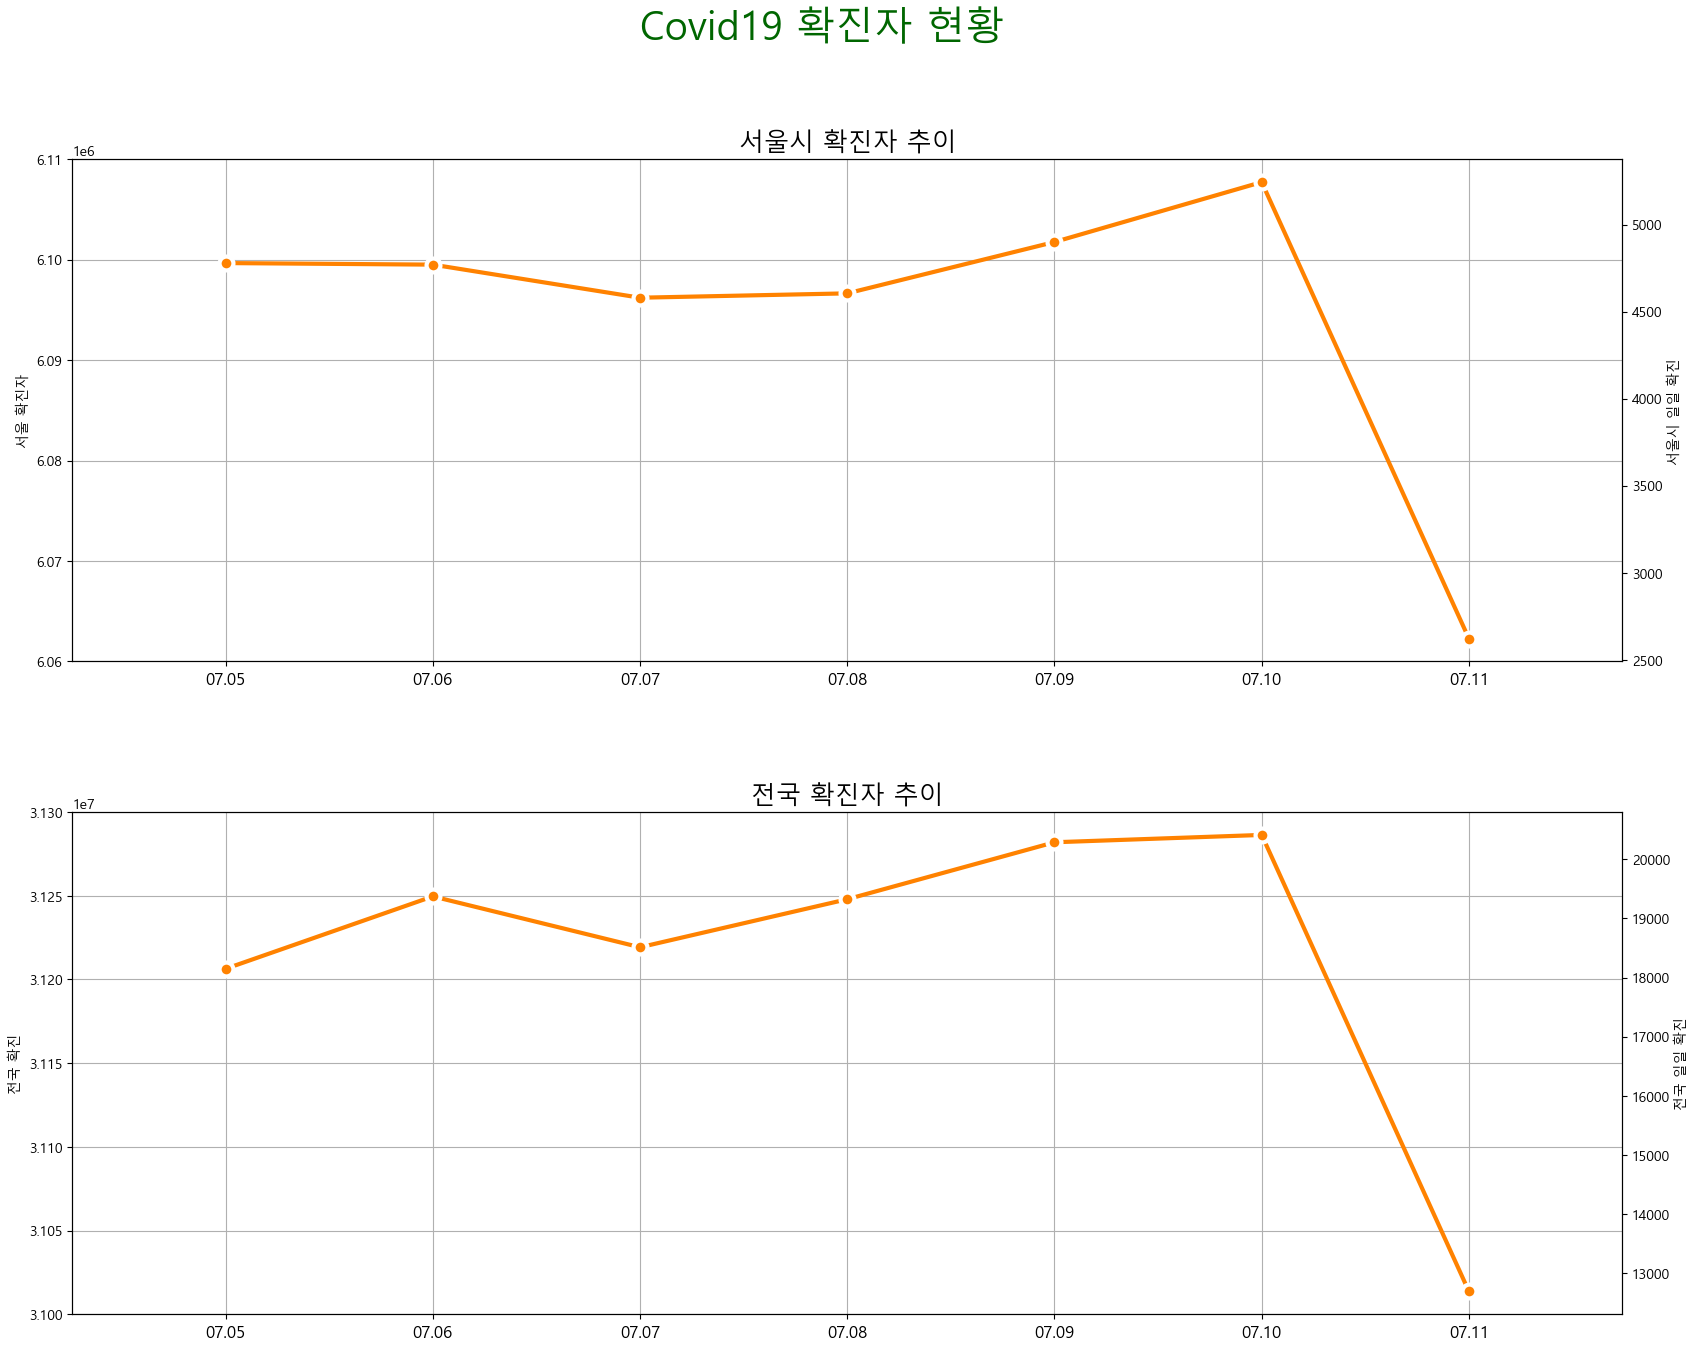

In [22]:
# 2행1열 서브플롯
fig, (ax1_left, ax2_left) = plt.subplots(2,1,figsize=(20,15))

# 각 서브플롯별로 twinx생성
ax1_right = ax1_left.twinx()
ax2_right = ax2_left.twinx()

# 전체제목
fig.suptitle('Covid19 확진자 현황', fontsize=28, color='#006600')

# 각 그래프 간의 세로(hspace) 간격 지정
fig.subplots_adjust(hspace=0.3)

# ax1_left 그래프
sb.barplot(data=target_df, x=x, y='서울 확진자', color='#3471CB', ax=ax1_left)
ax1_left.grid()
ax1_left.set_title('서울시 확진자 추이', fontsize=18)
ax1_left.set_ylim(6060000,6110000)
ax1_left.set_xticks(x)
ax1_left.set_xticklabels(xticks, fontsize=12, rotation=0)

# ax1_right 그래프
sb.lineplot(data=target_df, x=x, y='서울시 일일 확진', ax=ax1_right,
            color='#FF8200', linestyle='-', linewidth=3,
            marker="o", markersize=10, markerfacecolor='#FF8200',
            markeredgecolor='#ffffff', markeredgewidth=3)

# ax2_left 그래프
sb.barplot(data=target_df, x=x, y='전국 확진', color='#3471CB', ax=ax2_left)
ax2_left.grid()
ax2_left.set_title('전국 확진자 추이', fontsize=18)
ax2_left.set_ylim(31000000,31300000)
ax2_left.set_xticks(x)
ax2_left.set_xticklabels(xticks, fontsize=12, rotation=0)

# ax2_right 그래프
sb.lineplot(data=target_df, x=x, y='전국 일일 확진', ax=ax2_right,
            color='#FF8200', linestyle='-', linewidth=3,
            marker="o", markersize=10, markerfacecolor='#FF8200',
            markeredgecolor='#ffffff', markeredgewidth=3)

plt.show()
plt.close()